## **Exploring Euler's Method for Flow Matching and Diffusion Models** 

### **1. Introduction**
This notebook explores flow models in generative modeling, focusing on how the Euler method is used to simulate the flow $\psi_t$ by solving an ODE defined by a velocity field $u_t$. We will simulate the transformation of noise ($p_{init}$) into data ($p_{data}$), using both linear and nonlinear velocity fields, and analyze the impact of step size on the simulation. 

### **2. Setup: Import libraries**

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

### **3. Basic Flow Simulation with Euler's method**

As a starting point, we will use a linear velocity field $u_t(x)$ = $\psi$ x.  

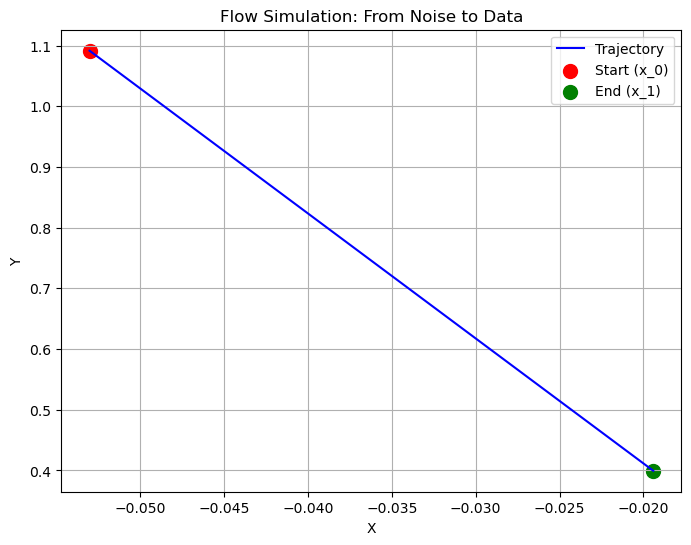

Starting point (x_0): [-0.05303256  1.09157325]
Ending point (x_1): [-0.01941163  0.39955111]


In [3]:
# Parameters 
theta = 1.0 
n_steps = 100
h = 1.0 / n_steps 

# Initial distribution: Sample x_0 from a 2D Gaussian N(0, I_2)
x_0 = np.random.randn(2) # 2D point [x, y]

# Define the velocity field u_t(x)
# Option 1: Linear velocity field 
def velocity_field_linear(x, t): 
    return -theta * x 

# Choose the velocity field to use 
velocity_field = velocity_field_linear

# Simulate the flow using Euler's method 
trajectory = [x_0]
x_t = x_0.copy() 
t = 0.0 

for i in range(n_steps): 
    # Compute the velocity at the current position and time 
    u_t = velocity_field(x_t, t)
    # Update the position using Euler's method: X_{t+h} = X_t + h * u_t(X_t)
    x_t = x_t + h * u_t
    # Update time 
    t += h 
    # Store the new position 
    trajectory.append(x_t.copy())

# Convert trejectory to numpy array for plotting 
trajectory = np.array(trajectory)

# Plot the trajectory 
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1], 'b-', label='Trajectory')
plt.scatter(trajectory[0, 0], trajectory[0, 1], c='red', label='Start (x_0)', s=100)
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], c='green', label='End (x_1)', s=100)
plt.title('Flow Simulation: From Noise to Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Print the start and end points
print(f"Starting point (x_0): {trajectory[0]}")
print(f"Ending point (x_1): {trajectory[-1]}")

### **4. Diffusion Models**

We will now use the Euler-Maruyama method to sample from a diffusion model. 

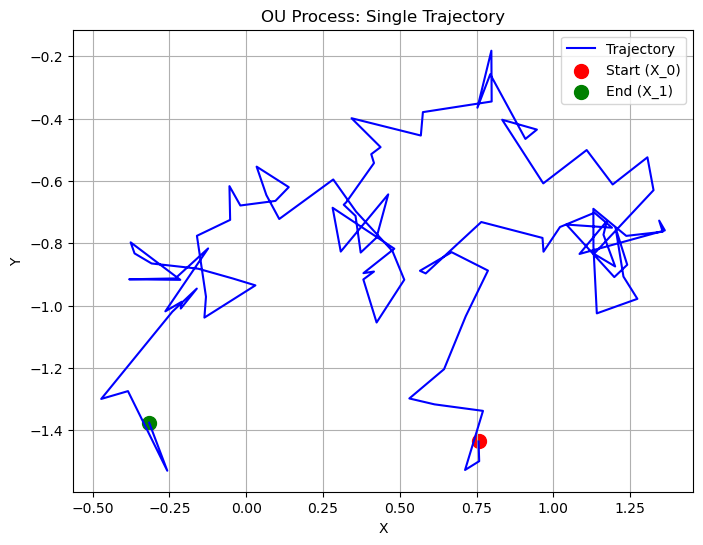

In [4]:
#Parameters 
theta = 1.0 
sigma = 1.0
n_steps = 100 
h = 1.0/n_steps 

#Initial distribution: Sample X_0 from a 2D Gaussian 
X_0 = np.random.randn(2)

#Simulate the SDE using Euler-Maruyama
t = 0.0 
X_t = X_0.copy() 
trajectory = [X_t]

for i in range(n_steps): 
    # Draw a sample epsilon
    epsilon = np.random.randn(2)
    # Update: X_{t+h} = X_t + h * u_t(X_t) + sigma_t * sqrt(h) * epsilon
    X_t = X_t + h * velocity_field_linear(X_t, t) + sigma * np.sqrt(h) * epsilon
    t += h 
    trajectory.append(X_t.copy())

trajectory = np.array(trajectory)
# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1], 'b-', label='Trajectory')
plt.scatter(trajectory[0, 0], trajectory[0, 1], c='red', label='Start (X_0)', s=100)
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], c='green', label='End (X_1)', s=100)
plt.title('OU Process: Single Trajectory')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

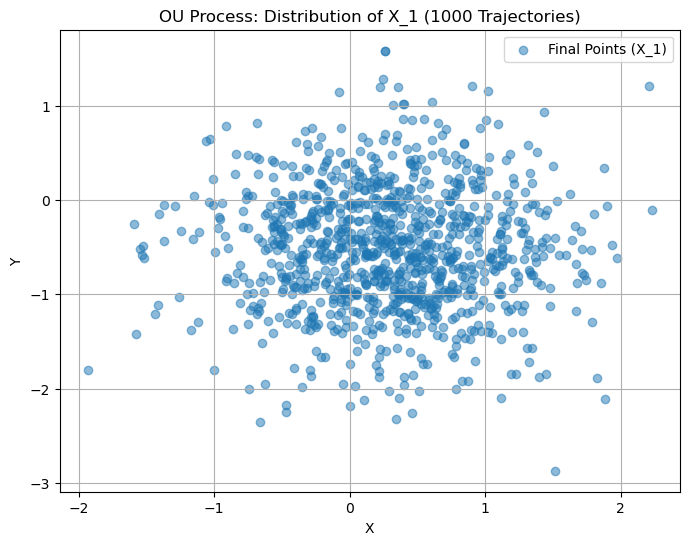

Mean of X_1: [ 0.28161179 -0.52609547]
Variance of X_1: [0.42477638 0.41711124]
Theoretical variance (sigma^2 / (2*theta)): 0.5


In [5]:
# Simulate multiple trajectories to see the distribution
n_trajectories = 1000 
final_points = []

for _ in range(n_trajectories):
    X_t = X_0.copy()
    t = 0.0 
    for i in range(n_steps): 
        epsilon = np.random.randn(2)
        X_t = X_t + h * velocity_field_linear(X_t, t) + sigma * np.sqrt(h) * epsilon
        t += h
    final_points.append(X_t)

final_points = np.array(final_points)
#Plot the distribution of final points
plt.figure(figsize=(8, 6))
plt.scatter(final_points[:, 0], final_points[:, 1], alpha=0.5, label='Final Points (X_1)')
plt.title('OU Process: Distribution of X_1 (1000 Trajectories)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Compute mean and variance of final points
mean_final = np.mean(final_points, axis=0)
var_final = np.var(final_points, axis=0)
print(f"Mean of X_1: {mean_final}")
print(f"Variance of X_1: {var_final}")
print(f"Theoretical variance (sigma^2 / (2*theta)): {sigma**2 / (2 * theta)}")

The single trajectory shows random fluctuations around the origin, and the distribution of X_1 (after 1000 trajectories) approximates a Gaussian. 

### **5. Diffusion Model with a Learned Velocity Field**

Now let's simulate a more general diffusion model where $u_t$ is a 'learned' velocity field, that is, where we have a target point (1, 1)

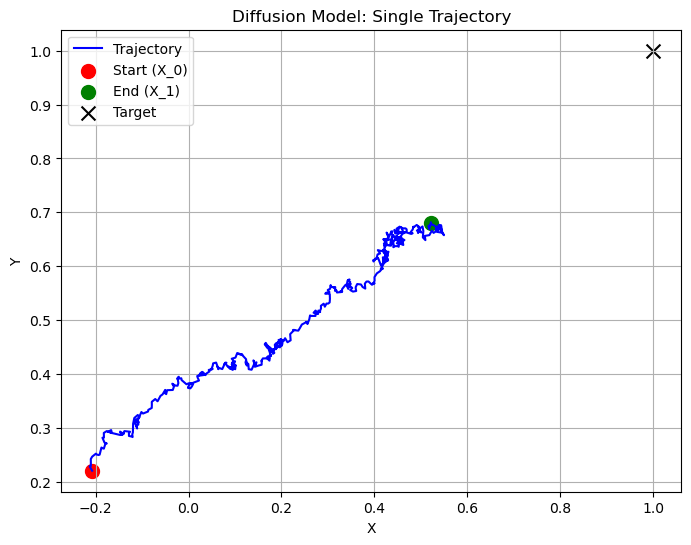

In [17]:
#Parameters 
sigma = 0.1
n_steps = 500
h = 1.0/n_steps
theta = 1.0

target = np.array([1.0, 1.0])

# Learned velocity field (simulating a neural network)
def velocity_field_learned(x, t): 
    return -theta * (x - target)

# Simulate the diffusion process
X_0 = np.random.randn(2)
t = 0.0 
X_t = X_0.copy()
trajectory = [X_t]

for i in range(n_steps): 
    epsilon = np.random.randn(2)
    X_t = X_t + h * velocity_field_learned(X_t, t) + sigma * np.sqrt(h) * epsilon
    t += h 
    trajectory.append(X_t.copy())

trajectory = np.array(trajectory)
# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1], 'b-', label='Trajectory')
plt.scatter(trajectory[0, 0], trajectory[0, 1], c='red', label='Start (X_0)', s=100)
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], c='green', label='End (X_1)', s=100)
plt.scatter([1.0], [1.0], c='black', label='Target', s=100, marker='x')
plt.title('Diffusion Model: Single Trajectory')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

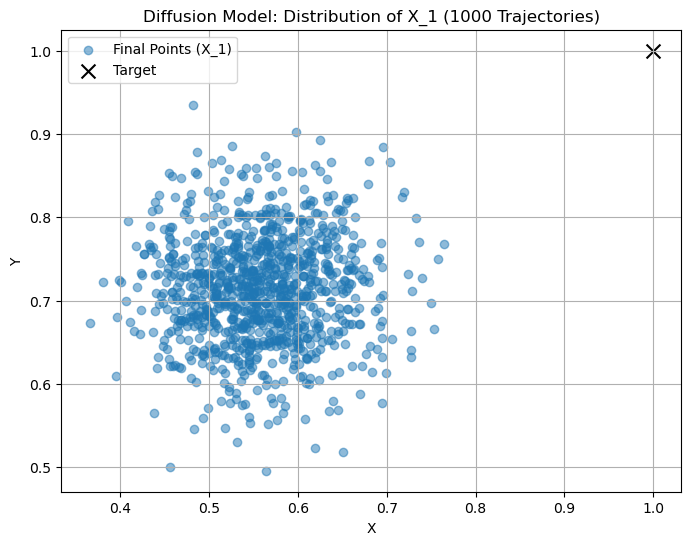

Mean of X_1: [0.55780494 0.71402719]
Variance of X_1: [0.00432258 0.00423377]


In [18]:
# Simulate multiple trajectories
final_points = []

for _ in range(n_trajectories):
    X_t = X_0.copy()
    t = 0.0
    for i in range(n_steps):
        epsilon = np.random.randn(2)
        X_t = X_t + h * velocity_field_learned(X_t, t) + sigma * np.sqrt(h) * epsilon
        t += h
    final_points.append(X_t)

final_points = np.array(final_points)

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.scatter(final_points[:, 0], final_points[:, 1], alpha=0.5, label='Final Points (X_1)')
plt.scatter([1.0], [1.0], c='black', label='Target', s=100, marker='x')
plt.title('Diffusion Model: Distribution of X_1 (1000 Trajectories)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Compute mean and variance
mean_final = np.mean(final_points, axis=0)
var_final = np.var(final_points, axis=0)
print(f"Mean of X_1: {mean_final}")
print(f"Variance of X_1: {var_final}")

The distribution of $X_1$ is centered around the coordinate [0.55, 0.71]. It should theoretically center around (1, 1), but it is not, possibly due to the small number of steps. 